**Static Camera Calibration using OpenCV (DJI Action 2) – Prabal Sharma**

📤 Please upload your chessboard images (multiple allowed)...


Saving dji_mimo_20250816_124642_129_1755328737682_photo.jpg to dji_mimo_20250816_124642_129_1755328737682_photo.jpg
Saving dji_mimo_20250816_124644_130_1755328737536_photo.jpg to dji_mimo_20250816_124644_130_1755328737536_photo.jpg
Saving dji_mimo_20250816_124646_131_1755328737397_photo.jpg to dji_mimo_20250816_124646_131_1755328737397_photo.jpg
Saving dji_mimo_20250816_124648_132_1755328737257_photo.jpg to dji_mimo_20250816_124648_132_1755328737257_photo.jpg
Saving dji_mimo_20250816_124650_133_1755328737115_photo.jpg to dji_mimo_20250816_124650_133_1755328737115_photo.jpg
Saving dji_mimo_20250816_124652_134_1755328736955_photo.jpg to dji_mimo_20250816_124652_134_1755328736955_photo.jpg
Saving dji_mimo_20250816_124654_135_1755328736816_photo.jpg to dji_mimo_20250816_124654_135_1755328736816_photo.jpg
Saving dji_mimo_20250816_124656_136_1755328736677_photo.jpg to dji_mimo_20250816_124656_136_1755328736677_photo.jpg
Saving dji_mimo_20250816_124700_137_1755328736553_photo.jpg to dji_mimo_

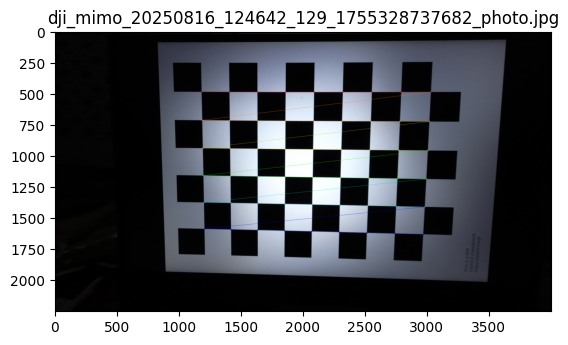

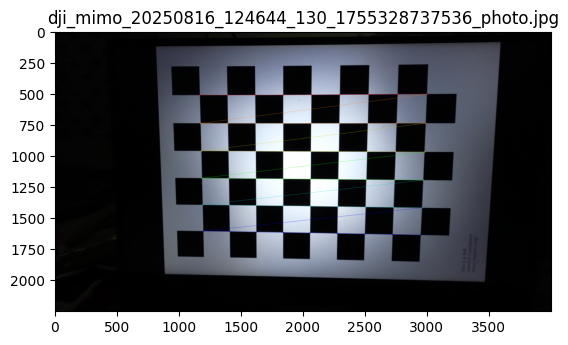

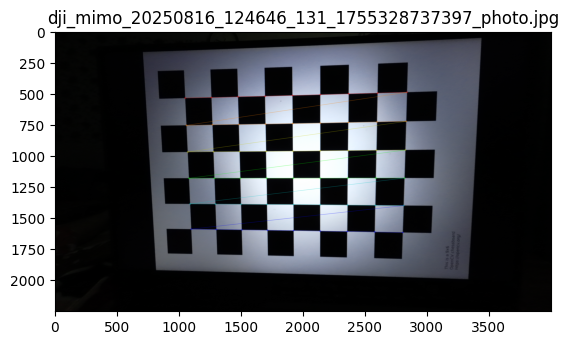

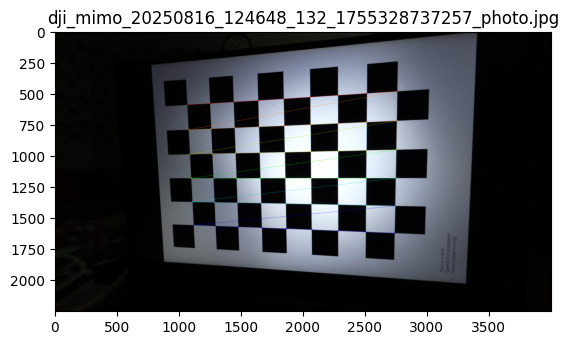

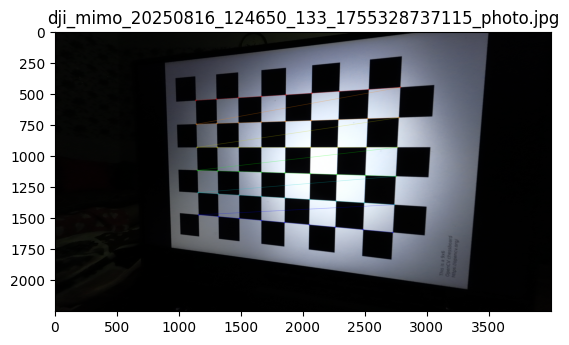

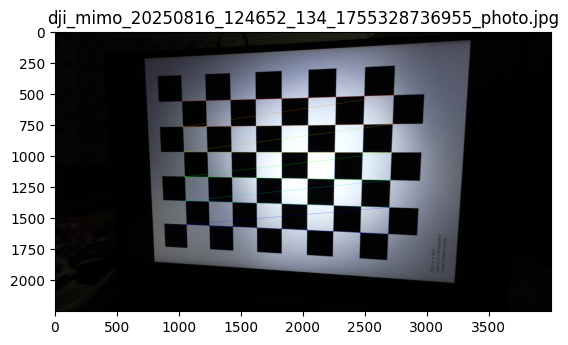

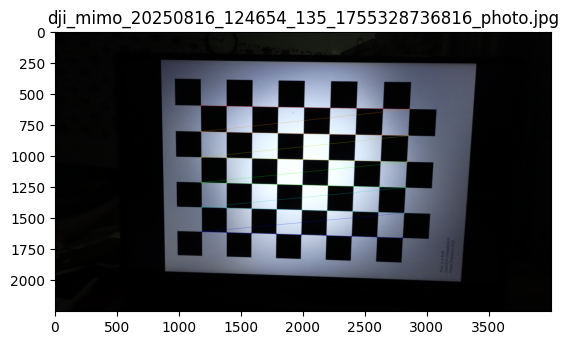

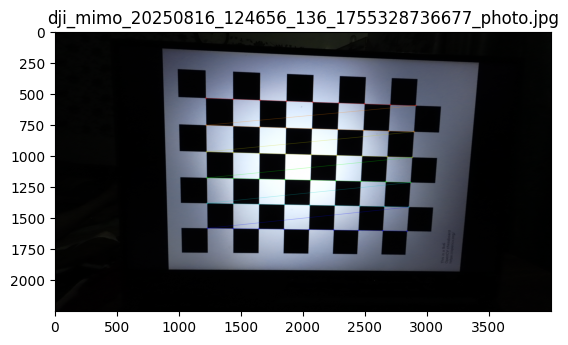

❌ Chessboard not detected in dji_mimo_20250816_124700_137_1755328736553_photo.jpg


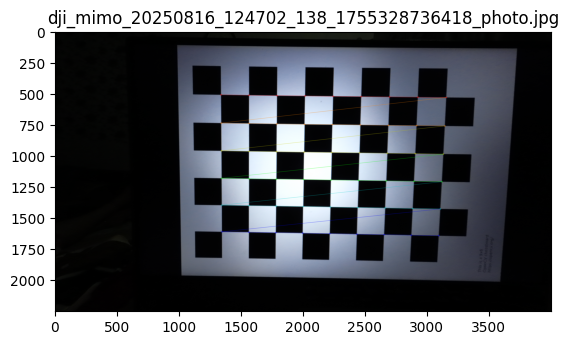

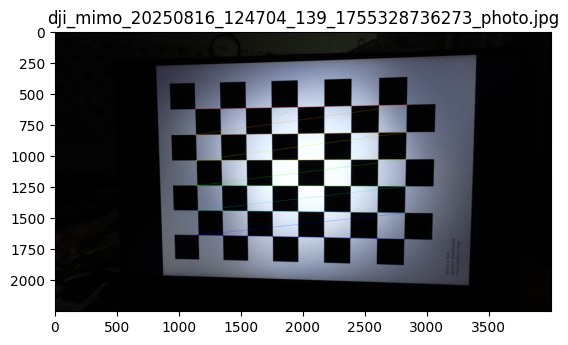

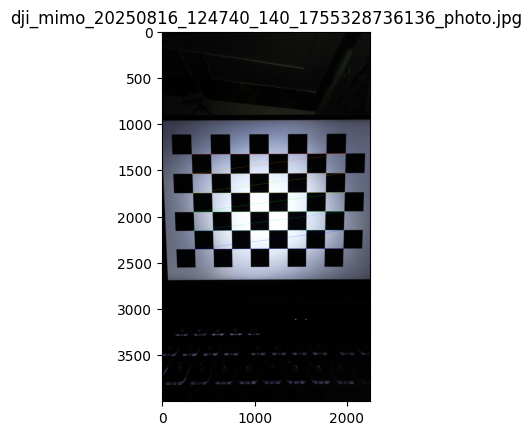

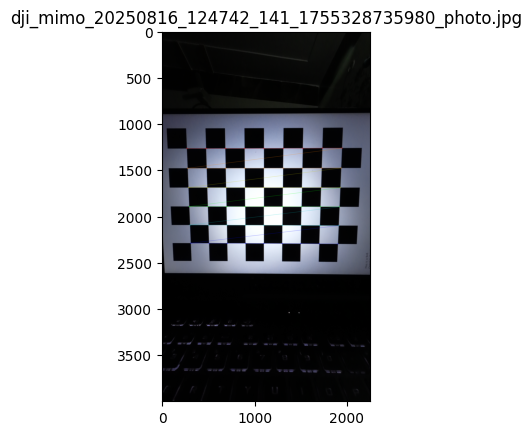

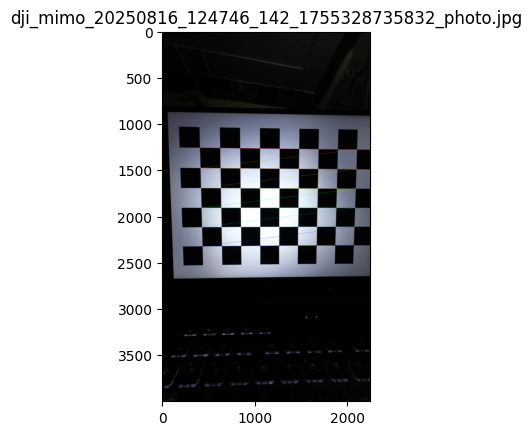

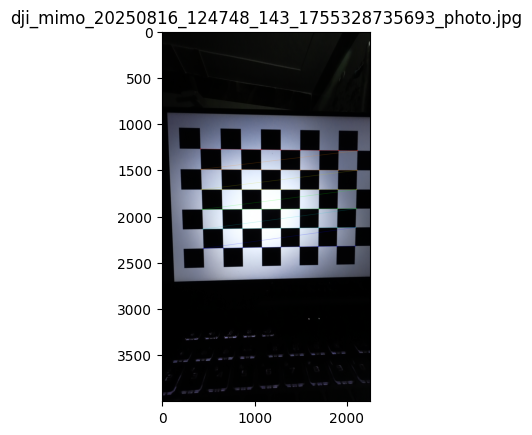

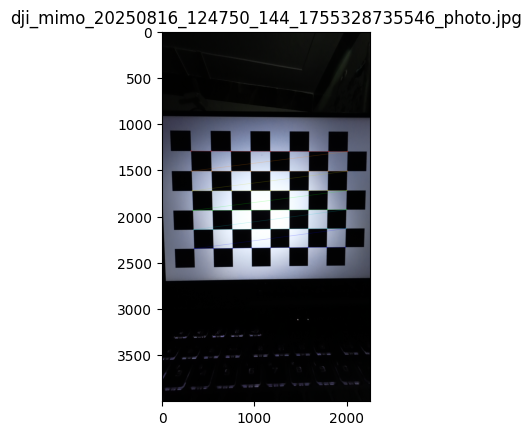

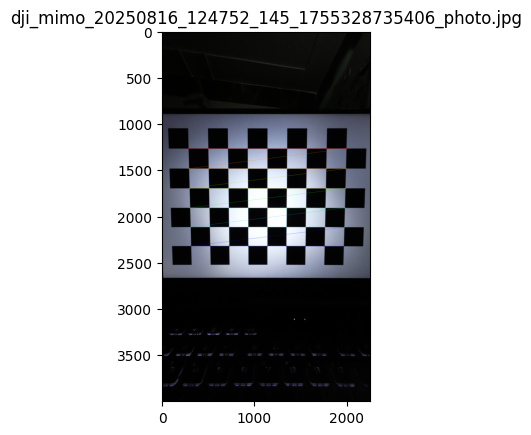


🎯 Camera Matrix (Intrinsic Parameters):
 [[1.84297155e+03 0.00000000e+00 1.84945948e+03]
 [0.00000000e+00 1.86395384e+03 1.13305779e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

🎯 Distortion Coefficients:
 [[ 0.03757226 -0.08224816  0.01083761  0.00660402  0.03935359]]

📏 Focal Length (in pixels): fx=1842.97, fy=1863.95
📍 Optical Center: cx=1849.46, cy=1133.06


In [2]:
import cv2
import numpy as np
import glob
from google.colab import files
import matplotlib.pyplot as plt

# --- STEP 1: Upload your chessboard images ---
print("📤 Please upload your chessboard images (multiple allowed)...")
uploaded = files.upload()

# Save uploaded image filenames
image_files = list(uploaded.keys())

# --- STEP 2: Chessboard pattern settings ---
chessboard_size = (9, 6)  # number of inner corners (columns, rows)
square_size = 1.0         # set this to actual square size (e.g. mm) if you want real-world units

# Prepare object points (0,0,0), (1,0,0), ...,(8,5,0)
objp = np.zeros((chessboard_size[0]*chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
objp *= square_size

objpoints = []  # 3D points in real world
imgpoints = []  # 2D points in image plane

# --- STEP 3: Detect corners in each uploaded image ---
for fname in image_files:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(
            gray, corners, (11,11), (-1,-1),
            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        )
        imgpoints.append(corners2)

        # Show detected corners
        cv2.drawChessboardCorners(img, chessboard_size, corners2, ret)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(fname)
        plt.show()
    else:
        print(f"❌ Chessboard not detected in {fname}")

# --- STEP 4: Calibrate camera ---
if len(objpoints) > 0:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1], None, None
    )

    print("\n🎯 Camera Matrix (Intrinsic Parameters):\n", mtx)
    print("\n🎯 Distortion Coefficients:\n", dist)

    fx, fy = mtx[0,0], mtx[1,1]
    cx, cy = mtx[0,2], mtx[1,2]

    print(f"\n📏 Focal Length (in pixels): fx={fx:.2f}, fy={fy:.2f}")
    print(f"📍 Optical Center: cx={cx:.2f}, cy={cy:.2f}")
else:
    print("❌ No valid chessboard images were uploaded.")
